In [104]:
import pandas as pd
import matplotlib.pyplot as plt

supreme = pd.read_csv('../data/supreme_1023.csv')

In [20]:
# Check for traditional binary variable

if supreme.decisionDirection.iloc[1] != 1.0:
    supreme.decisionDirection = supreme.decisionDirection - 1

<h3> Visuals - Liberal/Conservative Vote Ratio by Court

In [21]:
votes_subcourt = supreme.groupby('subCourt').decisionDirection.value_counts()

In [22]:
sc_list = []

for i, vote in enumerate(votes_subcourt.index):
    if votes_subcourt[i] > 150:
        sc_list.append(votes_subcourt.index[i][0])
        
vote_list = []

for i, vote in enumerate(votes_subcourt.index):
    if votes_subcourt[i] > 150:
        if votes_subcourt.index[i][1] == 0:
            vote_list.append('Conservative')
        if votes_subcourt.index[i][1] == 1:
            vote_list.append('Liberal')
            
count_list = []

for i, vote in enumerate(votes_subcourt.index):
    if votes_subcourt[i] > 150:
        count_list.append(votes_subcourt[i])

In [23]:
sc_list_17 = sc_list[-30:]
vote_list_17 = vote_list[-30:]
count_list_17 = count_list[-30:]

In [24]:
percent_count_list = []
for i, sc in enumerate(count_list_17):
    if i % 2 == 0:
        if i == 152:
            break
        else:
            number = count_list[i] / (count_list[i] + count_list[i+1])
            percent_count_list.append(number)
    else:
        number = count_list[i] / (count_list[i] + count_list[i-1])
        percent_count_list.append(number)
        
percent_count_list = [n*100 for n in percent_count_list]

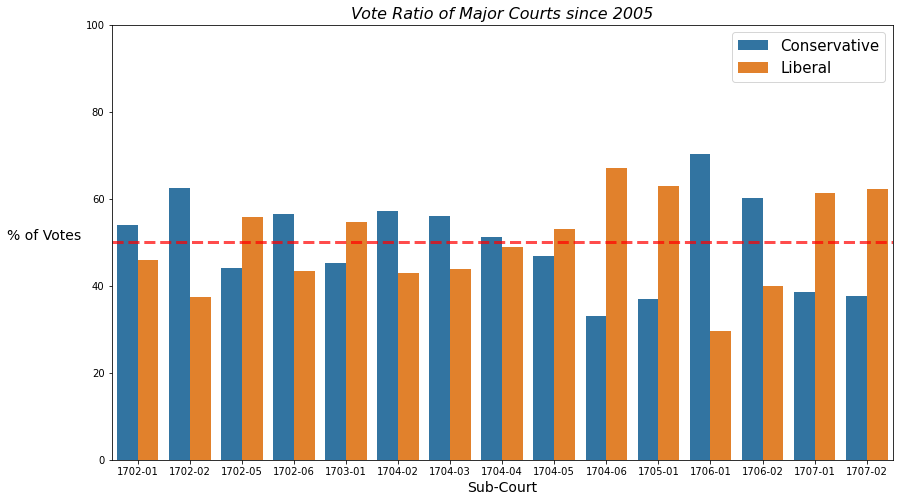

In [25]:
%matplotlib inline
import seaborn as sns

plt.figure(figsize=(14,8))
plt.title('')
plt.ylim(0,100)
ax = sns.barplot(x=sc_list_17, y=percent_count_list, hue=vote_list_17)
plt.legend(prop={"size":15})
ax.set_title('Vote Ratio of Major Courts since 2005', fontsize=16, style='oblique')
ax.set_xlabel('Sub-Court', fontsize=14)
ax.set_ylabel('% of Votes', fontsize=14, rotation = 0, horizontalalignment='right');
ax.axhline(y=50, linewidth=3, color='red', alpha=.7, linestyle='--');

plt.savefig('vote_ratio_since_2005')

<h3> Visuals - Liberal/Conservative Vote Ratio by Issue

In [443]:
votes_issue = supreme.groupby('issueArea').decisionDirection.value_counts()

In [444]:
sc_list = []

for i, vote in enumerate(votes_issue.index):
    if i < 22:
        sc_list.append(votes_issue.index[i][0])
        
vote_list = []

for i, vote in enumerate(votes_issue.index):
    if i < 22:
        if votes_issue.index[i][1] == 0:
                vote_list.append('Conservative')
        elif votes_issue.index[i][1] == 1:
                vote_list.append('Liberal')
            
count_list = []

for i, vote in enumerate(votes_issue.index):
    if i < 22:
        count_list.append(votes_issue.iloc[i])

In [445]:
percent_count_list = []
for i, sc in enumerate(count_list):
    if i % 2 == 0:
        number = count_list[i] / (count_list[i] + count_list[i+1])
        percent_count_list.append(number)
    else:
        number = count_list[i] / (count_list[i] + count_list[i-1])
        percent_count_list.append(number)
        
percent_count_list = [n*100 for n in percent_count_list]

In [446]:
issues = ['Criminal Procedure', 'Civil Rights', 'First Amendment', 'Due Process', 'Privacy', 'Attorneys', 'Unions',
         'Economic Activity', 'Judicial Power', 'Federalism', 'Federal Taxation']

In [ ]:
plt.ylim(0,100)

sns.set(font='Georgia')
plt.legend(prop={"size":15})
ax.set_title('Supreme Court Issue Bias by Issue in {chief} Court ({min_year} - {max_year})\n'.format(chief=chief,
                                                                                            min_year=min_year,
                                                                                            max_year=max_year), 
             fontsize=22, style='oblique')
ax.set_xlabel('Issue', fontsize=20)
ax.set_ylabel('% of \n Votes', fontsize=20, rotation = 0, horizontalalignment='right');
ax.axhline(y=50, linewidth=3, color='red', alpha=.7, linestyle='--')
ax.set_xticklabels(['Criminal \n Procedure', 'Civil Rights', 'First \n Amendment', 'Due Process', 'Privacy', 'Attorneys', 'Unions',
         'Economic \n Activity', 'Judicial \n Power', 'Federalism', 'Federal \n Taxation'], rotation=30, fontsize=16)
ax.set_yticklabels([0,20,40,60,80,100], fontsize=16)

plt.savefig('Bias_by_Issue_in_{chief}_Court'.format(chief=chief))


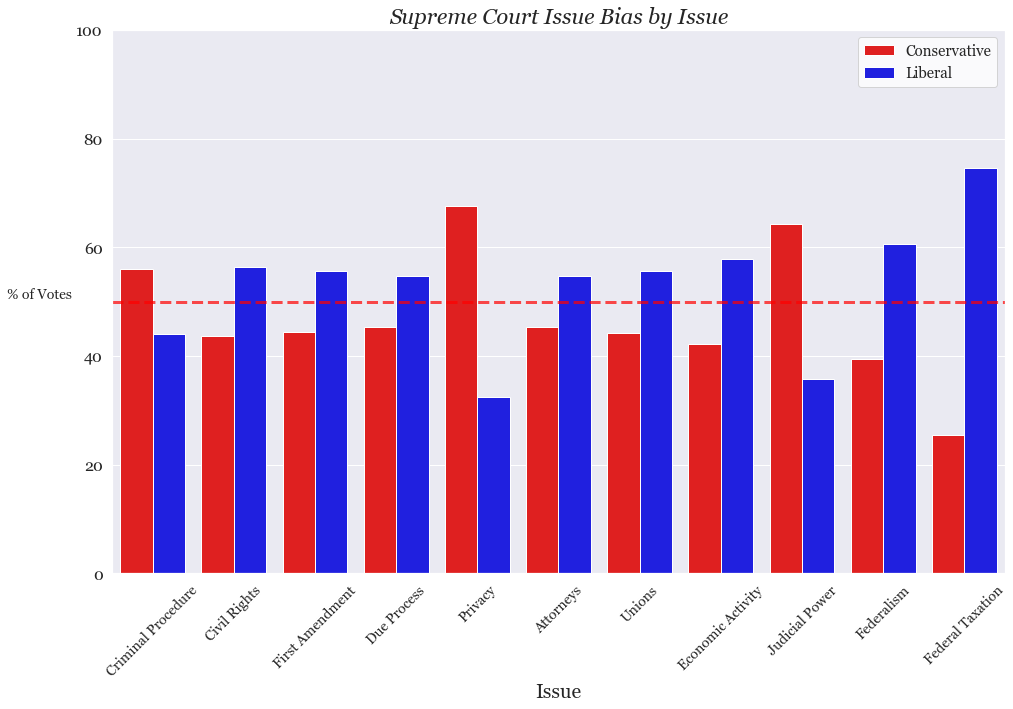

In [452]:
%matplotlib inline
import seaborn as sns

plt.figure(figsize=(16,10))
plt.title('')
plt.ylim(0,100)
clrs = ['red' if x =='Conservative' else 'blue' for x in vote_list]
sns.set(font='Georgia')
ax = sns.barplot(x=sc_list, y=percent_count_list, hue=vote_list, palette=clrs)

plt.legend(facecolor='white', prop={"size":15})
ax.set_title('Supreme Court Issue Bias by Issue', fontsize=22, style='oblique')
ax.set_xlabel('Issue', fontsize=20)
ax.set_ylabel('% of Votes', fontsize=14, rotation = 0, horizontalalignment='right');
ax.axhline(y=50, linewidth=3, color='red', alpha=.7, linestyle='--')
ax.set_xticklabels(['Criminal Procedure', 'Civil Rights', 'First Amendment', 'Due Process', 'Privacy', 'Attorneys', 'Unions',
         'Economic Activity', 'Judicial Power', 'Federalism', 'Federal Taxation'], rotation=45, fontsize=14)
ax.set_yticklabels([0,20,40,60,80,100], fontsize=16)

plt.savefig('Bias_by_Issue')


<h3>Creating abbreviation key for second app

In [21]:
import pandas as pd

supreme = pd.read_csv('../data/supreme_1023.csv')

In [22]:
full_names = ['Justice Harold Hitz Burton (1945 - 1958)',
              'Justice Robert H. Jackson (1941 - 1954)',
              'Justice William O. Douglas (1939 - 1975)',
              'Justice Felix Frankfurter (1939 - 1962)',
             'Justice Stanley Forman Reed (1938 - 1957)',
             'Justice Hugo Black (1937 - 1971)', 
             'Justice Wiley Blount Rutledge (1941 - 1954)', 
             'Justice Frank Murphy (1940 - 1949)',
             'Chief Justice Fred M. Vinson (1946 - 1953)', 
             'Justice Tom C. Clark (1949 - 1967)', 
             'Justice Sherman Minton (1949 - 1956)',
             'Chief Justice Earl Warren (1953 - 1969)',
             'Justice John Marshall Harlan (1955 - 1971)',
             'Justice William J. Brennan, Jr. (1956 - 1990)',
              'Justice Charles Evan Whittaker (1957 - 1962)',
             'Justice Potter Stewart (1956 - 1981)',
             'Justice Byron White (1962 - 1993)',
             'Justice Arthur Goldberg (1962 - 1965)', 
              'Justice Abe Fortas (1965 - 1969)',
              'Justice Thurgood Marshall (1967 - 1991)',
              'Chief Justice Warren E. Burger (1969 - 1986)',
              'Justice Harry Blackmun (1970 - 1994)',
              'Justice F. Powell Jr. (1972 - 1987)',
              'Chief Justice William Rehnquist (1972 - 1986)',
              'Justice John Paul Stevens (1975 - 2010)',
              'Justice Sandra Day OConnor (1981 - 2006)',
              'Justice Antonin Scalia (1986 - 2016)',
              'Justice Anthony Kennedy (1988 - 2018)',
              'Justice David Souter (1990 - 2009)', 
              'Justice Clarence Thomas (1991 - Present)', 
              'Justice Ruth Bader Ginsburg (1993 - 2020)',
              'Justice Stephen Breyer (1994 - Present)',
              'Chief Justice John Roberts (2005 - Present)',
              'Justice Samuuel Alito (2006 - Present)',
              'Justice Sonia Sotomayor (2009 - Present)', 
              'Justice Elena Kagan (2010 - Present)', 
              'Justice Neil Gorsuch (2017 - Present)', 
              'Justice Brett Kavanaugh (2018 - Present)']

In [23]:
term_list = []
for i, name in enumerate(full_names):
    if full_names[i][-2] == 't':
        term = full_names[i][-15:-1]
        term_list.append(term)
    else:
        term = full_names[i][-12:-1]
        term_list.append(term)

In [24]:
term_list

['1945 - 1958',
 '1941 - 1954',
 '1939 - 1975',
 '1939 - 1962',
 '1938 - 1957',
 '1937 - 1971',
 '1941 - 1954',
 '1940 - 1949',
 '1946 - 1953',
 '1949 - 1967',
 '1949 - 1956',
 '1953 - 1969',
 '1955 - 1971',
 '1956 - 1990',
 '1957 - 1962',
 '1956 - 1981',
 '1962 - 1993',
 '1962 - 1965',
 '1965 - 1969',
 '1967 - 1991',
 '1969 - 1986',
 '1970 - 1994',
 '1972 - 1987',
 '1972 - 1986',
 '1975 - 2010',
 '1981 - 2006',
 '1986 - 2016',
 '1988 - 2018',
 '1990 - 2009',
 '1991 - Present',
 '1993 - 2020',
 '1994 - Present',
 '2005 - Present',
 '2006 - Present',
 '2009 - Present',
 '2010 - Present',
 '2017 - Present',
 '2018 - Present']

In [25]:
abbreviations = list(supreme.justiceName_x.unique())

In [80]:
# Find mean MQ for each individual judge 

MQ = supreme.groupby('justiceName_x').mean()['martin_quinn'].values

In [81]:
MQ

array([-1.34755652, -1.10190323,  0.75332506,  2.47436957,  0.54355556,
        0.45569243,  1.18390483,  3.58589631, -0.65510023, -1.5771157 ,
       -1.31059908,  0.91655317,  0.99444716, -1.66297043,  0.02533794,
        1.02433358, -1.28940081,  0.96679152,  1.67403547, -1.44429833,
        0.97004005,  0.97567227,  0.38842845, -1.65492191,  0.97735731,
        1.81880561,  1.16986816,  1.00062805, -1.19908506,  1.14390671,
       -2.61303178,  0.4256765 , -2.79388016, -1.66752957,  1.8978008 ,
        3.26605091, -1.81058964, -5.56970256])

In [50]:
MQ = MQ.reset_index()

In [82]:
df = pd.DataFrame({'justiceName': full_names, 'justiceAbbrev': abbreviations,
                  'yearsOnCourt': term_list})

In [79]:
df['MQ'] = 0

for i, abbrev in enumerate(df.justiceAbbrev):
    for n, abbreviation in enumerate(MQ.justiceName_x):
        if MQ.iloc[n][0] == df.iloc[i][1]:
            df.iloc[i][3] = MQ.iloc[n][1]

<ipython-input-79-018029ac153e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[i][3] = MQ.iloc[n][1]


In [83]:
# Sort Judges chronologically, and set MQ column

df = df.sort_values(by='justiceAbbrev')
df['MQ'] = MQ

In [90]:
# Reset order and store dataset

df = df.sort_values(by='yearsOnCourt')
df.to_csv('../data/JusticeDetails.csv')

In [102]:
df[df['justiceName'] == 'Justice Hugo Black (1937 - 1971)']['MQ'].values

array([-1.28940081])

<h3>Visuals - Liberal/Conservative Vote Ratio by Issue by CJ (need to put into function)

In [106]:
chiefs = supreme['chief'].unique()
chiefs

array(['Vinson', 'Warren', 'Burger', 'Rehnquist', 'Roberts'], dtype=object)

In [143]:
new_court = supreme[supreme['chief']== 'Warren']
chief = new_court['chief'].values[0]

In [144]:
votes_issue = new_court.groupby('issueArea').decisionDirection.value_counts()

In [145]:
new_court['chief'].values[0]

'Warren'

In [146]:
sc_list = []

for i, vote in enumerate(votes_issue.index):
    if i < 22:
        sc_list.append(votes_issue.index[i][0])
        
vote_list = []

for i, vote in enumerate(votes_issue.index):
    if i < 22:
        if votes_issue.index[i][1] == 0:
                vote_list.append('Conservative')
        elif votes_issue.index[i][1] == 1:
                vote_list.append('Liberal')
            
count_list = []

for i, vote in enumerate(votes_issue.index):
    if i < 22:
        count_list.append(votes_issue.iloc[i])

In [147]:
# For CJ = Warren

if chief == 'Warren':
    percent_count_list = []
    for i, sc in enumerate(count_list):
        if i < 8:
            if i % 2 == 0:
                number = count_list[i] / (count_list[i] + count_list[i+1])
                percent_count_list.append(number)
            else:
                number = count_list[i] / (count_list[i] + count_list[i-1])
                percent_count_list.append(number)
        elif i == 8:
            percent_count_list.append(1)
        elif i > 8:
            if i % 2 == 0:
                number = count_list[i] / (count_list[i] + count_list[i-1])
                percent_count_list.append(number)
            else:
                number = count_list[i] / (count_list[i] + count_list[i+1])
                percent_count_list.append(number)   
else:
    percent_count_list = []
    for i, sc in enumerate(count_list):
        if i % 2 == 0:
            number = count_list[i] / (count_list[i] + count_list[i+1])
            percent_count_list.append(number)
        else:
            number = count_list[i] / (count_list[i] + count_list[i-1])
            percent_count_list.append(number)

        
percent_count_list = [n*100 for n in percent_count_list]

In [148]:
issues = ['Criminal Procedure', 'Civil Rights', 'First Amendment', 'Due Process', 'Privacy', 'Attorneys', 'Unions',
         'Economic Activity', 'Judicial Power', 'Federalism', 'Federal Taxation']

min_year = new_court['term'].min()
max_year = new_court['term'].max()

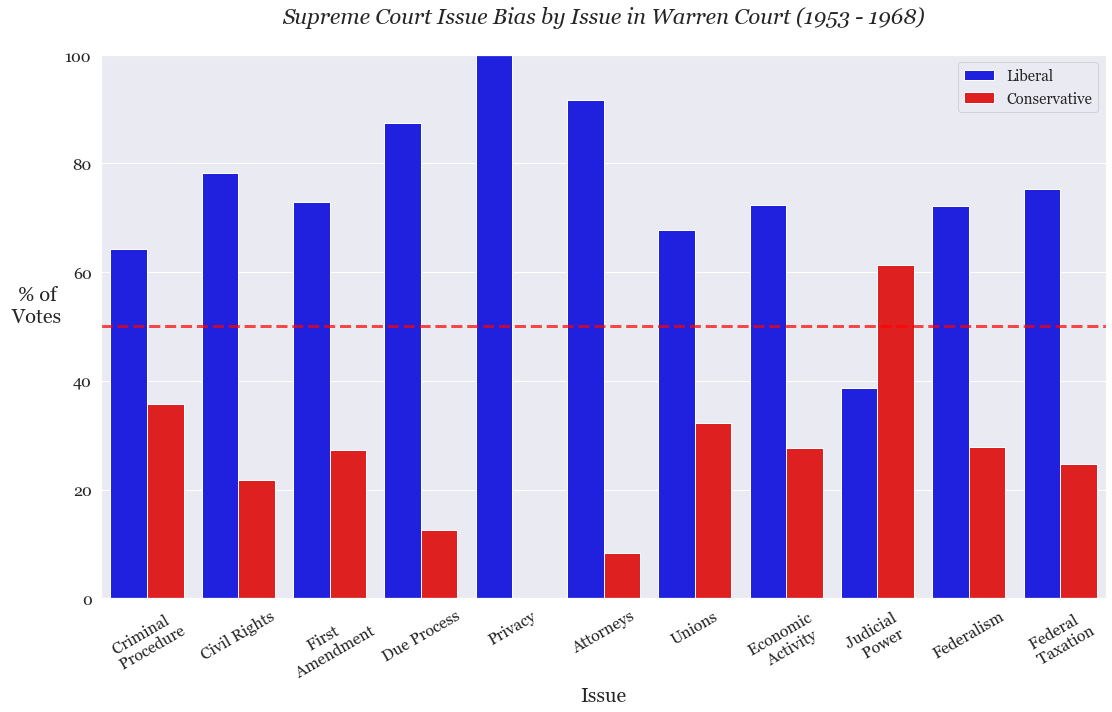

In [149]:
%matplotlib inline
import seaborn as sns

plt.figure(figsize=(18,10))
plt.title('')
plt.ylim(0,100)
clrs = ['red' if x =='Conservative' else 'blue' for x in vote_list]
ax = sns.barplot(x=sc_list, y=percent_count_list, hue=vote_list, palette=clrs)
sns.set(font='Georgia')
plt.legend(prop={"size":15})
ax.set_title('Supreme Court Issue Bias by Issue in {chief} Court ({min_year} - {max_year})\n'.format(chief=chief,
                                                                                            min_year=min_year,
                                                                                            max_year=max_year), 
             fontsize=22, style='oblique')
ax.set_xlabel('Issue', fontsize=20)
ax.set_ylabel('% of \n Votes', fontsize=20, rotation = 0, horizontalalignment='right');
ax.axhline(y=50, linewidth=3, color='red', alpha=.7, linestyle='--')
ax.set_xticklabels(['Criminal \n Procedure', 'Civil Rights', 'First \n Amendment', 'Due Process', 'Privacy', 'Attorneys', 'Unions',
         'Economic \n Activity', 'Judicial \n Power', 'Federalism', 'Federal \n Taxation'], rotation=30, fontsize=16)
ax.set_yticklabels([0,20,40,60,80,100], fontsize=16)

plt.savefig('Bias_by_Issue_in_{chief}_Court'.format(chief=chief))


<h3> Visuals - Change of MQ over time

In [504]:
subcourt_list = ['1301-01', '1301-02', '1301-03', '1303-01', '1303-02', '1303-03', '1303-04', '1303-05', '1401-01',
                '1402-01', '1403-01', '1403-02', '1403-03', '1404-01', '1405-01', '1405-02', '1405-03', '1405-04', 
                '1406-01', '1406-02', '1406-03', '1406-04', '1407-01', '1407-02', '1408-01', '1408-02', '1408-03',
                '1408-04', '1409-01', '1409-02', '1410-01', '1410-02', '1411-01', '1501-01', '1502-01', '1502-02',
                '1503-01', '1504-01', '1504-02', '1504-03', '1504-04', '1504-05', '1505-01', '1506-01', '1506-02',
                '1506-03', '1506-04', '1506-05', '1506-06', '1507-01', '1507-02', '1507-03', '1507-04', '1507-05',
                '1601-01', '1602-01', '1603-01', '1603-02', '1603-03', '1604-01', '1604-02', '1605-01', '1605-02',
                '1605-03', '1605-04', '1606-01', '1607-01', '1607-02', '1607-03', '1607-04', '1607-05', '1607-06',
                '1607-07', '1607-08', '1607-09', '1609-10', '1609-11', '1609-12', '1609-13', '1609-14', '1609-15',
                '1609-16', '1609-17','1701-01', '1702-01', '1702-02', '1702-03', '1702-04', '1702-05', '1702-06', 
                '1703-01', '1704-01', '1704-02', '1704-03', '1704-04', '1704-05', '1704-06', '1704-07', '1705-01',
                '1705-02', '1706-01', '1706-02', '1707-01', '1707-02']

In [151]:
import pandas as pd

supreme = pd.read_csv('data/supreme_1023.csv')

FileNotFoundError: [Errno 2] File data/supreme_1023.csv does not exist: 'data/supreme_1023.csv'

In [192]:
supreme[supreme.caseName.str.contains('GORE')].caseName.unique()

array(['GORE v. UNITED STATES',
       'BMW OF NORTH AMERICA, INC. v. IRA GORE, JR.',
       'FEDERAL ELECTION COMMISSION v. JAMES E. AKINS, RICHARD CURTISS, PAUL FINDLEY, ROBERT J. HANKS, ANDREW KILLGORE, AND ORIN PARKER',
       'GEORGE W. BUSH AND RICHARD CHENEY v. ALBERT GORE, JR., et al.'],
      dtype=object)

In [313]:
caseIdList = ['1972-048', '1989-126', '2014-070', '1952-001', '2000-009', '2007-001', '1995-048',
             '1965-122']

sample_cases = supreme[supreme.caseId.isin(caseIdList)].groupby('caseId').mean()[['petitioner', 'respondent', 'issue', 'issueArea', 
                                                                                  'subCourt_MQ', 'caseDisposition', 'decisionDirection',
                                                                                 'term']]

In [314]:
case_names = ['Brown v Board of Education - 1952 (Desegregation of Public Schools)', 
              'Miranda v Arizona - 1965 (Prisoner Rights)',
              'Roe v Wade - 1972 (Abortion)', 'Cruzon v Missouri Dept of Health - 1989 (Right to Die)', 
             'United States v Christopher Lee Armstrong - 1995 (Racial Profiling)', 
              'Bush v Gore - 2000 (Federal Elections)',
             'District of Columbia v Heller - 2007 (Gun Rights)', 'Obergefell v Hodges - 2014 (Same-Sex Marraige)']

In [315]:
sample_cases['case_name'] = case_names

sample_cases.to_csv('../data/web_app_sample_cases.csv')

In [316]:
sample_cases = pd.read_csv('../data/web_app_sample_cases.csv')

In [317]:
sample_cases

,caseId,petitioner,respondent,issue,issueArea,subCourt_MQ,caseDisposition,decisionDirection,term,case_name
0,1952-001,224.0,21.0,90200.0,9.0,4.204,1.0,0.0,1952.0,Brown v Board of Education - 1952 (Desegregati...
1,1965-122,100.0,28.0,10100.0,1.0,-8.863,3.0,1.0,1965.0,Miranda v Arizona - 1965 (Prisoner Rights)
2,1972-048,155.0,28.0,50020.0,5.0,-0.649,3.0,1.0,1972.0,Roe v Wade - 1972 (Abortion)
3,1989-126,229.0,28.0,50030.0,5.0,-1.106,2.0,0.0,1989.0,Cruzon v Missouri Dept of Health - 1989 (Right...
4,1995-048,27.0,100.0,10160.0,1.0,5.704,4.0,0.0,1995.0,United States v Christopher Lee Armstrong - 19...
5,2000-009,211.0,211.0,20010.0,2.0,3.524,4.0,0.0,2000.0,Bush v Gore - 2000 (Federal Elections)
6,2007-001,21.0,164.0,20210.0,2.0,2.551,2.0,1.0,2007.0,District of Columbia v Heller - 2007 (Gun Rights)
7,2014-070,162.0,7.0,40010.0,4.0,-1.525,3.0,1.0,2014.0,Obergefell v Hodges - 2014 (Same-Sex Marraige)


In [311]:
sample_cases[sample_cases['case_name']==caseTitle]['term'].values

KeyError: 'term'

<h3>Exploring influence of court on decisions as a whole - PRESENTATION GRAPHIC

In [252]:
supreme[supreme.subCourt_MQ>0][supreme.decisionDirection == 0.0].groupby(['caseId']).mean().sample(40)

<ipython-input-252-1ec91c7f42a9>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  supreme[supreme.subCourt_MQ>0][supreme.decisionDirection == 0.0].groupby(['caseId']).mean().sample(40)


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,decisionType,term,naturalCourt,petitioner,petitionerState,respondent,respondentState,...,direction,majority,firstAgreement,secondAgreement,martin_quinn,post_sd,post_med,post_025,post_975,subCourt_MQ
caseId,,,,,,,,,,,,,,,,,,,,,
1975-178,36404.0,36431.0,58290.0,1.0,1975.0,1506.0,28.0,49.0,100.0,NaN,...,1.444444,1.555556,98.000000,NaN,0.534889,0.235444,0.533556,0.079889,1.001778,4.814
1993-051,59989.0,60034.0,94277.0,1.0,1993.0,1606.0,126.0,NaN,27.0,NaN,...,1.333333,1.666667,107.000000,NaN,0.542556,0.299444,0.541000,-0.039333,1.138889,4.883
1951-085,5853.0,5853.0,10893.0,1.0,1951.0,1303.0,126.0,NaN,28.0,13.0,...,1.333333,1.666667,NaN,NaN,0.477444,0.251556,0.476556,-0.012667,0.969889,4.297
1976-065,37025.0,37052.0,59226.0,1.0,1976.0,1506.0,247.0,NaN,249.0,NaN,...,1.000000,2.000000,NaN,NaN,0.369111,0.234222,0.367889,-0.085667,0.833222,3.322
1991-108,58388.0,58433.0,92091.0,1.0,1991.0,1605.0,208.0,NaN,184.0,NaN,...,1.222222,1.777778,101.666667,NaN,0.730222,0.270889,0.728667,0.212778,1.267778,6.572
1980-107,43136.0,43172.0,68577.0,2.0,1980.0,1506.0,135.0,NaN,123.0,NaN,...,1.000000,1.888889,NaN,NaN,0.174778,0.255444,0.174111,-0.319889,0.672111,1.573
2011-064,73894.0,73957.0,113603.0,1.0,2011.0,1704.0,8.0,60.0,327.0,NaN,...,1.333333,1.666667,112.000000,NaN,0.214111,0.327667,0.211444,-0.425000,0.859000,1.927
1992-032,58775.0,58820.0,92604.0,1.0,1992.0,1605.0,27.0,NaN,100.0,NaN,...,1.000000,2.000000,NaN,NaN,0.707111,0.289111,0.703222,0.151333,1.286000,6.364
1949-017,3496.0,3496.0,6655.0,1.0,1949.0,1303.0,145.0,NaN,28.0,5.0,...,1.000000,2.000000,NaN,NaN,0.408333,0.304000,0.403000,-0.176667,1.013889,3.675


In [261]:
supreme[supreme.caseId == '1995-048']['caseName'].unique()

array(['UNITED STATES v. CHRISTOPHER LEE ARMSTRONG et al.'], dtype=object)

In [346]:
supreme[supreme['naturalCourt'] == 1301]['term'].min()

1946

In [349]:
natural_courts = supreme['naturalCourt'].unique()

In [365]:
event_year_list = []

for court in natural_courts:
    min_year = supreme[supreme['naturalCourt'] == court]['term'].min()
    event_year_list.append(min_year)

In [352]:
unique_terms

array([1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956,
       1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967,
       1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [366]:
event_year_list_unique = []
[event_year_list_unique.append(year) for year in event_year_list if year not in event_year_list_unique]
years_and_mq = zip(unique_terms, mq_by_term)
years_and_mq = list(years_and_mq)

event_mq_list = []

for n, year in enumerate(years_and_mq):
    for i, term in enumerate(event_year_list_unique):
        if years_and_mq[n][0] == event_year_list_unique[i]:
            event_mq_list.append(years_and_mq[n][1])

In [372]:
event_coordinates

[(1946, -3.240999999999987),
 (1949, 3.6750000000000482),
 (1953, 1.1660000000000215),
 (1954, -1.1428667496886653),
 (1956, -4.528320704845814),
 (1958, -4.391622222222174),
 (1961, -5.40644230769231),
 (1962, -9.264999999999874),
 (1965, -8.862999999999921),
 (1967, -10.938999999999952),
 (1968, -10.50649627174794),
 (1969, -5.7854316163410795),
 (1971, -1.0126730641959716),
 (1975, 4.496552238806063),
 (1981, 2.4549999999999517),
 (1986, -0.15100000000000358),
 (1987, -0.5096734693877343),
 (1990, 1.242110320284716),
 (1991, 6.5313469387755765),
 (1993, 4.882999999999918),
 (1994, 5.978999999999972),
 (2005, 2.3617441860464985),
 (2009, 2.1631086956521846),
 (2015, -3.1389969230768857),
 (2016, -2.702832214765087),
 (2018, -2.3379999999999805)]

<h1>Next plan is to plot event_coordinates on a scatter plot to show significant events

In [368]:
event_coordinates = zip(event_year_list_unique,event_mq_list)
event_coordinates = list(event_coordinates)

In [399]:
cj_years = [1952,1968,1985,2004]
cj_mq = [4.204,-10.507,1.682,1.54]

In [ ]:
mq_by_term = supreme.groupby('term').mean()['subCourt_MQ']
unique_terms = supreme.term.unique()

unique_mq = supreme.subCourt_MQ.unique()

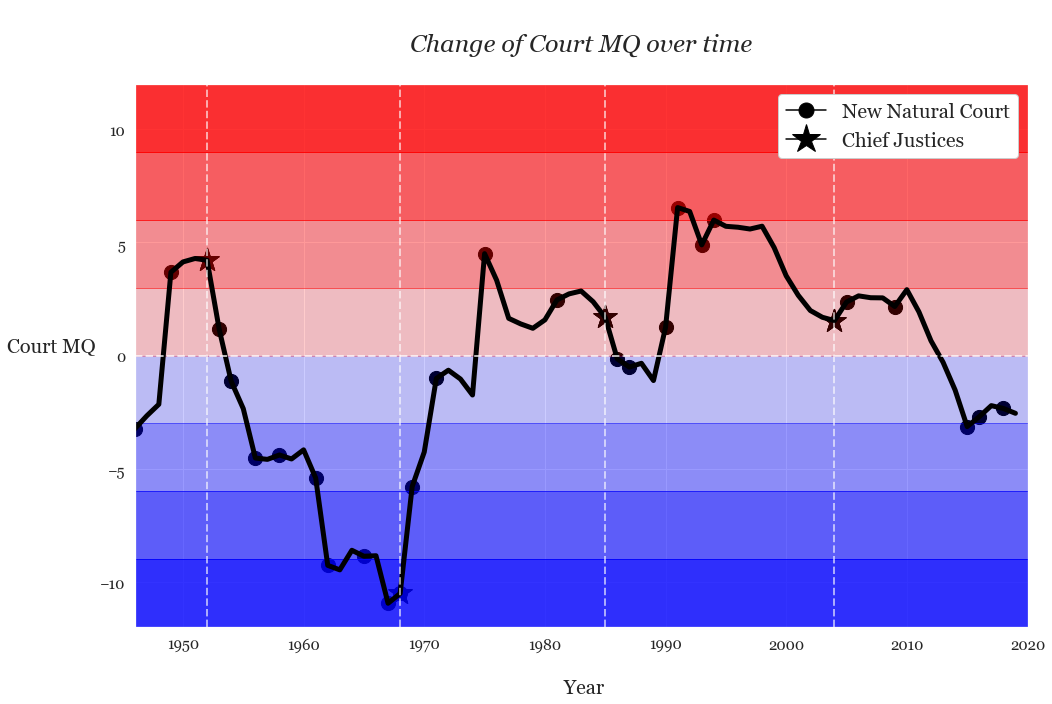

In [441]:
sns.set(font='Georgia')

import matplotlib.lines as mlines

black_star = mlines.Line2D([], [], color='black', marker='*',
                          markersize=30, label='Chief Justices')
black_circle = mlines.Line2D([], [], color='black', marker='.',
                          markersize=30, label='New Natural Court')

plt.figure(figsize=(16,10))
leg = plt.legend(facecolor='white', handles=[black_circle, black_star], prop={"size":20}, framealpha=1)
    
plt.ylim(-12,12)
plt.xlim(1946,2020)
ax = sns.lineplot(x=unique_terms, y=mq_by_term, linewidth=5, color='black')
plt.scatter(x=event_year_list_unique, y=event_mq_list, s=200, c='black')


ax.set_title('\n Change of Court MQ over time \n', fontsize=25, style='oblique')
ax.set_xlabel('\n Year', fontsize=20)
ax.set_ylabel('Court MQ', fontsize=20, rotation = 0, horizontalalignment='right')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

ax.axhline(y=0, linewidth=2, color='white', alpha=.7, linestyle='--')
ax.axhspan(-12,-9, color ='blue',alpha=.8)
ax.axhspan(-9,-6, color ='blue',alpha=.6)
ax.axhspan(-6,-3, color ='blue',alpha=.4)
ax.axhspan(-3,0, color='blue', alpha=.2)
ax.axhspan(0,3, color='red', alpha=.2)
ax.axhspan(3,6, color='red', alpha=.4)
ax.axhspan(6,9, color='red', alpha=.6)
ax.axhspan(9,12, color='red', alpha=.8)
ax.axvline(x=1952, linewidth=2, color='white', alpha=.6, linestyle='--')
ax.axvline(x=1968, linewidth=2, color='white', alpha=.6, linestyle='--')
ax.axvline(x=1985, linewidth=2, color='white', alpha=.6, linestyle='--')
ax.axvline(x=2004, linewidth=2, color='white', alpha=.6, linestyle='--')
ax.scatter(x=cj_years, y=cj_mq, s=600, c='black', marker='*')
ax.scatter(x=cj_years, y=cj_mq, s=600, c='black', marker='*')
ax.scatter(x=cj_years, y=cj_mq, s=600, c='black', marker='*')

;

plt.savefig('Court_MQ_over_time_by_Court')

In [620]:
supreme.chief.unique()

array(['Vinson', 'Warren', 'Burger', 'Rehnquist', 'Roberts'], dtype=object)

In [610]:
length = supreme[supreme['chief'] == 'Roberts'].caseDisposition.isnull().value_counts()[0]

In [625]:
for judge in supreme.chief.unique():
    the_length = supreme[supreme['chief'] == judge].caseDisposition.isnull().value_counts()[0]
    {judge}_percent.format(judge=judge) = (supreme[supreme['chief'] == judge].caseDisposition.value_counts().sort_index()) / the_length

#roberts_percent = supreme[supreme['chief'] == 'Roberts'].caseDisposition.value_counts().sort_index() / length


SyntaxError: invalid syntax (<ipython-input-625-559b745aa099>, line 3)

In [ ]:
%matplotlib inline
import seaborn as sns

plt.figure(figsize=(16,10))
plt.title('')
plt.ylim(0,100)
ax = sns.barplot(x=sc_list, y=percent_count_list, hue=vote_list, palette='deep')
plt.legend(prop={"size":15})
ax.set_title('Supreme Court Issue Bias by Issue in Rehnquist Court (1986 - 2004)', fontsize=16, style='oblique')
ax.set_xlabel('Issue', fontsize=14)
ax.set_ylabel('% of Votes', fontsize=14, rotation = 0, horizontalalignment='right');
ax.axhline(y=50, linewidth=3, color='red', alpha=.7, linestyle='--')
#ax.set_xticklabels(['Criminal Procedure', 'Civil Rights', 'First Amendment', 'Due Process', 'Privacy', 'Attorneys', 'Unions',
         'Economic Activity', 'Judicial Power', 'Federalism', 'Federal Taxation'], rotation=45, fontsize=12)

plt.savefig('Bias_by_Issue_in_Rehnquist_Court')


In [584]:
supreme.groupby('caseDisposition').mean()

,Unnamed: 0,Unnamed: 0.1,decisionType,term,naturalCourt,petitioner,petitionerState,respondent,respondentState,jurisdiction,...,direction,majority,firstAgreement,secondAgreement,martin_quinn,post_sd,post_med,post_025,post_975,subCourt_MQ
caseDisposition,,,,,,,,,,,,,,,,,,,,,
1.0,26578.324468,42765.542553,2.444149,1968.393617,1454.539894,149.760638,32.333333,74.577128,29.942085,4.313830,...,1.606145,1.838889,76.222222,22.888889,0.098633,0.270545,0.097809,-0.428846,0.630141,0.884290
2.0,38888.954786,61509.953081,1.476178,1978.181795,1507.923975,139.933904,31.038767,126.149749,30.383217,1.194963,...,1.503876,1.786567,91.334653,41.003086,-0.020290,0.283778,-0.020222,-0.575538,0.535228,-0.160480
3.0,33892.104747,53951.801330,1.468091,1974.013587,1481.437535,146.023509,28.071327,129.172793,29.980729,1.193821,...,1.547605,1.814834,92.490828,46.335938,-0.108902,0.277564,-0.108552,-0.652948,0.433344,-0.957743
4.0,44177.730223,69554.079061,1.392449,1982.853587,1533.796561,138.716117,28.450886,123.138162,27.985345,1.142416,...,1.572126,1.828808,90.221936,27.582633,-0.051631,0.290182,-0.051497,-0.619627,0.516138,-0.446653
5.0,42349.260370,66712.962731,1.968686,1981.795688,1529.296612,137.211602,29.009764,116.549179,29.073456,1.187064,...,1.541046,1.844846,82.851044,11.864078,-0.143570,0.293718,-0.143156,-0.718752,0.430388,-1.258980
6.0,39153.448023,62022.836018,1.698389,1977.775988,1506.257687,130.017570,39.217391,161.459736,28.363636,1.263543,...,1.578867,1.798473,98.272727,104.000000,0.021322,0.278329,0.021403,-0.522644,0.566180,0.200883
7.0,44374.148777,69978.106658,1.354620,1982.243207,1532.170516,137.330163,28.903226,131.915761,29.671429,1.146060,...,1.558577,1.784123,96.469697,54.176471,-0.003414,0.285575,-0.003181,-0.562237,0.555408,-0.014124
8.0,32259.782178,51569.719472,2.059406,1972.537954,1477.933993,120.062706,34.732759,107.900990,34.193548,2.198020,...,1.484536,1.814189,92.925926,92.833333,-0.013756,0.277422,-0.013950,-0.557040,0.529733,-0.117512
9.0,35960.087278,57184.668681,3.932863,1975.839879,1494.638805,152.964753,28.123810,96.653911,29.449071,2.020477,...,1.190576,1.859945,92.695876,100.285714,-0.144137,0.281398,-0.143747,-0.695987,0.405375,-1.243619


In [572]:
supreme.groupby('chief').mean()[['martin_quinn','subCourt_MQ']]

,martin_quinn,subCourt_MQ
chief,,
Burger,0.086035,0.812363
Rehnquist,0.323022,2.907579
Roberts,0.039185,0.382149
Vinson,0.091217,0.820543
Warren,-0.736444,-6.598010


In [ ]:
for i, vote in enumerate(votes_issue.index):
    if i < 22:
        count_list.append(votes_issue.iloc[i])
sc_list = []

for i, vote in enumerate(votes_issue.index):
    if i < 22:
        sc_list.append(votes_issue.index[i][0])
        
vote_list = []


In [626]:
martin_quinn = pd.read_csv('martin_quinn.csv')

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, f1_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [629]:
def find_scores(name, model_code):
    
    # set model variable
    model = model_code
    
    # fit individual model and predict
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Accuracy and F1 Score
    score = metrics.accuracy_score(y_test, y_pred)
    f1score = f1_score(y_test, y_pred, average='weighted')

    # Return Accuray, Precision and F1 score
    print("{name} accuracy is".format(name=name), score)
    print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_pred, average='weighted'), 
                                                         recall_score(y_test, y_pred, average='weighted')))
    print('f1 score: ', f1score)
    score = round(score,4)
    
    # Create Confusion Matrix
    plot_confusion_matrix(model, X_test, y_test)
    plt.title('Confusion Matrix for {name} - (Acc - {score})'.format(name=name, score=score));

In [631]:
martin_quinn

,term,justice,justiceName,post_mn,post_sd,post_med,post_025,post_975
0,1965,97,AFortas,-1.332,0.267,-1.323,-1.894,-0.830
1,1966,97,AFortas,-1.514,0.224,-1.508,-1.975,-1.098
2,1967,97,AFortas,-1.355,0.225,-1.346,-1.824,-0.938
3,1968,97,AFortas,-1.099,0.283,-1.088,-1.694,-0.581
4,1962,96,AJGoldberg,-1.154,0.225,-1.145,-1.608,-0.732
...,...,...,...,...,...,...,...,...
750,1971,81,WODouglas,-7.752,0.972,-7.722,-9.729,-5.967
751,1972,81,WODouglas,-7.782,1.003,-7.757,-9.792,-5.920
752,1973,81,WODouglas,-7.821,1.039,-7.790,-9.879,-5.874
753,1974,81,WODouglas,-7.890,1.072,-7.864,-10.025,-5.878


In [637]:
from sklearn.linear_model import LinearRegression

In [639]:
X = martin_quinn[['justice', 'term']]
y = martin_quinn['post_mn']

lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

-2.2997535140213553e+26

In [635]:
# split data into test and train sets

X = martin_quinn[['justice', 'term']]
y = martin_quinn['post_mn']

# hold out 20% of the data for final testing

from sklearn.preprocessing import OneHotEncoder
from numpy import asarray

encoder = OneHotEncoder(sparse=False)

#X = asarray(X)
#X = X.reshape(-1,1)
y = asarray(y)
y = y.reshape(-1,1)

X = encoder.fit_transform(X)
#y = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, 
                                         random_state=10)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)


find_scores('KNN', KNeighborsClassifier(n_neighbors=10))
find_scores('LogReg', LogisticRegression())
find_scores('Gaussian', GaussianNB())
#find_scores('SVM', SVC(kernel='linear'))
find_scores('Decision Tree', DecisionTreeClassifier())
find_scores('Random Forest', RandomForestClassifier())

/Users/nick/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


ValueError: Unknown label type: 'continuous'

In [276]:
percent_liberal = supreme.groupby('issueArea').mean()['decisionDirection']

In [279]:
percent_liberal.iloc[0]

0.44084901003674654

In [281]:
percent_conservative = [1-i for i in percent_liberal]

In [285]:
lib_con = list(zip(percent_liberal,percent_conservative))

In [275]:
import numpy as np

np.arange(1,15,1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [303]:
lib_list = []

for i in x_axis:
    lib_list.append('Liberal')

In [304]:
len(x_axis)

13

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

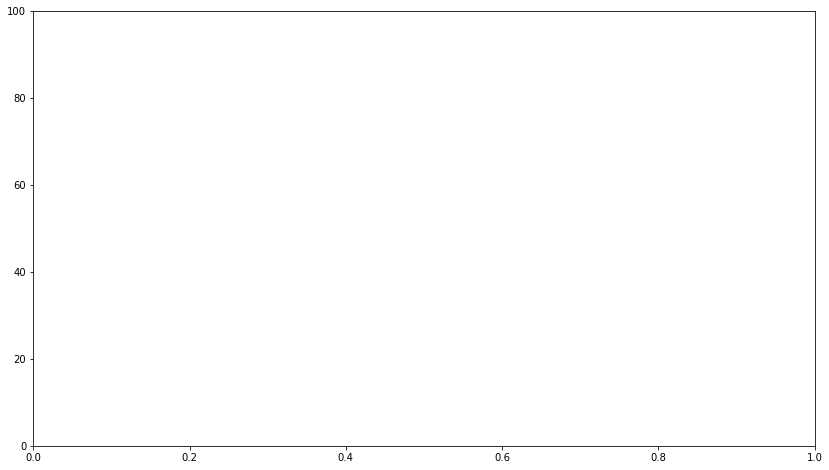

In [305]:
plt.figure(figsize=(14,8))
plt.title('')
plt.ylim(0,100)

x_axis = np.arange(1,14,1)

ax = sns.barplot(x=x_axis, y=percent_liberal, hue=lib_list)
plt.legend(prop={"size":15})
ax.set_title('Vote Ratio of Major Courts since 2005', fontsize=16, style='oblique')
ax.set_xlabel('Sub-Court', fontsize=14)
ax.set_ylabel('% of Votes', fontsize=14, rotation = 0, horizontalalignment='right');
ax.axhline(y=50, linewidth=3, color='red', alpha=.7, linestyle='--');

plt.savefig('vote_ratio_since_2005')

In [212]:
percent_count_list = [n*100 for n in percent_count_list]
    

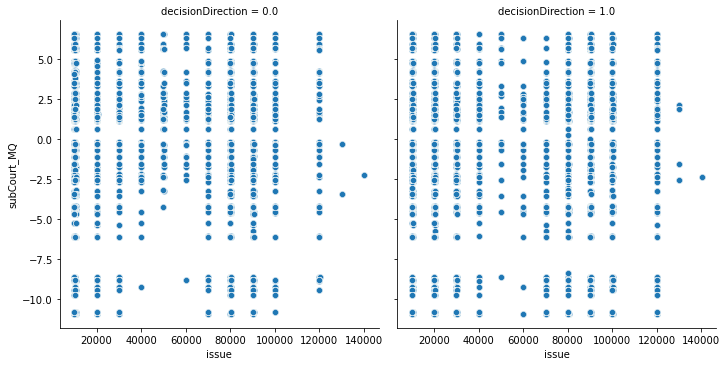

In [263]:
sns.relplot(
    data=supreme, x="issue", y="subCourt_MQ",
    col="decisionDirection", hue="day", style="day",
    kind="scatter"
)

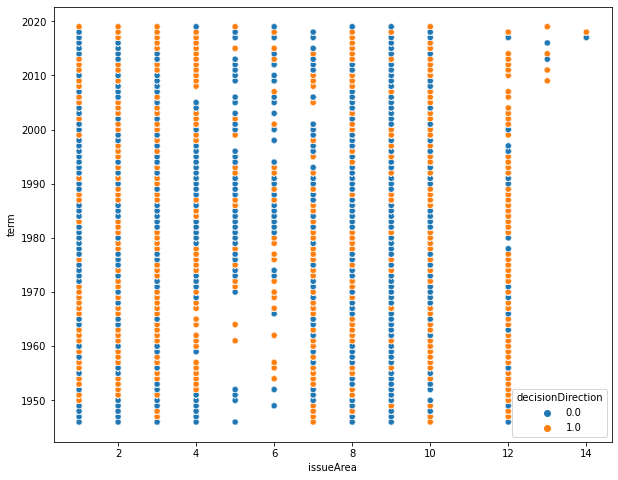

In [265]:
import seaborn as sns

plt.figure(figsize=(10,8))
sns.scatterplot(data=supreme, x='issueArea', y='term', hue='decisionDirection');

In [24]:
supreme.caseDisposition.value_counts()

2.0     23466
4.0     21692
3.0     17738
5.0      9740
9.0      2979
7.0      1472
6.0       683
1.0       376
8.0       303
10.0      116
Name: caseDisposition, dtype: int64

In [26]:
values = supreme.issue.value_counts()

In [28]:
values.index

Float64Index([ 10050.0,  80010.0,  10020.0, 120010.0,  30010.0,  90120.0,
               80100.0,  80060.0, 100030.0,  20400.0,
              ...
               80290.0,  60040.0,  20380.0,  90070.0,  90050.0, 140060.0,
               90100.0, 140030.0,  90270.0,  10240.0],
             dtype='float64', length=260)